In [1]:
%matplotlib notebook

from __future__ import print_function
import fenics
import matplotlib.pyplot as plt
import dolfin
import mshr
import math
from dolfin import *
import numpy as np


In [2]:
x_boundary = Constant(0.0)
y_boundary = Constant(0.0)


In [3]:
#Define Boundary Conditions

def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], -.0, tol)
def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 64.0, tol)
def boundary_S(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[1], .0, tol)

def boundary_N(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[1], -64.0, tol)


<IPython.core.display.Javascript object>


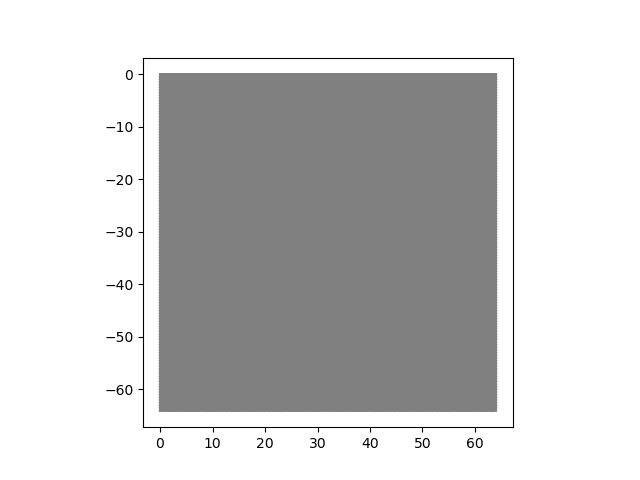

1

In [4]:
# Create mesh and define function space
#Number of nodes
n = 128


mesh = RectangleMesh(Point(-0.0,.0),Point(64.0,-64.0),n,n)
File("mesh.pvd") << mesh
plot(mesh)

V = FunctionSpace(mesh, "CG", 1)

# Define boundary condition

bc_L = DirichletBC(V, x_boundary, boundary_L)
bc_R = DirichletBC(V, x_boundary, boundary_R)
bc_S = DirichletBC(V, y_boundary, boundary_S)
bc_N = DirichletBC(V, y_boundary, boundary_N)

bcs = [bc_L, bc_R,bc_S, bc_N]
#bcs = [bc_L,bc_R,bc_N]

class K(UserExpression):
    def set_k_values(self, k_0, k_1):
        self.k_0, self.k_1 = k_0, k_1

    def eval(self, value, x):
        "Set value[0] to value at point x"
        tol = 1E-14
        if ((x[1] < -10 + tol) & (x[1]>=-20 +tol) & (x[0]>=33 +tol) & (x[0]<=40 +tol)):
            value[0] = self.k_0
        else:
            value[0] = self.k_1

kappa = K(degree=0)
kappa.set_k_values(1, 1)
            
# Define viational problem
u = TrialFunction(V)
v = TestFunction(V)
#u = TrialFunction(V)
f = Constant("0")
g = Constant("0")
a = kappa*dot(grad(u), grad(v))*dx
#L = f*v*dx-g*v*ds
L = f*v*dx
A, b = assemble_system(a, L,bcs)
#A, b = assemble_system(a, L)
delta = PointSource(V, Point(31.5, -27.5), 1) 
delta.apply(b)
delta2 = PointSource(V, Point(32.5, -27.5), -1) 
delta2.apply(b)

u = Function(V)



# Compute solution
solve(A, u.vector(), b)



<IPython.core.display.Javascript object>


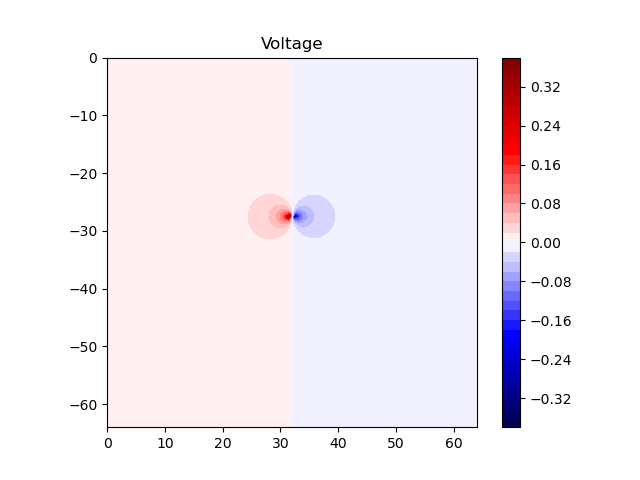

In [5]:
# Plot solution
plt.figure()
p = plot(u, title="Voltage",cmap='seismic')

plt.colorbar(p)

plt.show()

